# It is a regression problem 

## We are doing the machine learning on house price dataset

<table align="center" width=100%> 
    <tr> 
        </td>
            </td>
        </td>
        <td> 
            <div align="center"> 
                <font color= "#21618C" size=8px> 
                    <b> Regression  modeling on House Price Data </b>
                </font>
            </div> 
        </td> 
    </tr>
</table> 

# Problem Statement 

This detaset is created for the prediction of House Prices from an Indian perspective. The dataset contains  various features that are important during the application for the selling the


In [131]:
# import 'Pandas'
import pandas as pd
# pandas is utilized to format the data structure it means it can convert any data structure into pandas Data Frame 

# import'numpy'
import numpy as np 

# import 'Seaborn'
import seaborn as sns

# import subpackages of  Matplotlib
import matplotlib.pyplot as plt 

# import Root Mean Squared Error 
from sklearn.metrics import root_mean_squared_error

### Load the Dataset

In [30]:
# Load and name the csv file as df_houseprice 
df_houseprice = pd.read_csv('../House_Price1.csv')

# Display first five observations using head()
df_houseprice

,price,resid_area,air_qual,room_num,age,distance,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,19.0,5.64,NO,5.478,12.1912,NaN,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,19.0,6.48,YES,7.940,15.1760,NaN,47,YES,0.060694,1


## Data Overview 

In [32]:
# Name the Columns 

df_houseprice.columns

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'distance',
       'teachers', 'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms',
       'waterbody', 'rainfall', 'bus_ter', 'parks', 'Sold'],
      dtype='object')

**Interpretation**

 - `price`: Price of the house.
 - `resid_area`: Residencial Area where my house is located.
 - `air_qual`: Air Quality index around the house

In [34]:
# Basic Info of the Dataset
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   distance     506 non-null    float64
 6   teachers     506 non-null    float64
 7   poor_prop    506 non-null    float64
 8   airport      506 non-null    object 
 9   n_hos_beds   498 non-null    float64
 10  n_hot_rooms  506 non-null    float64
 11  waterbody    351 non-null    object 
 12  rainfall     506 non-null    int64  
 13  bus_ter      506 non-null    object 
 14  parks        506 non-null    float64
 15  Sold         506 non-null    int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 63.4+ KB


**Interpretation**

 - We have 13 numerical columns and 3 chategoricle columns.
 - We have null values in the data.
 - We have total 16 columns in the data 

In [36]:
# Shape of the data 
df_houseprice.shape

(506, 16)

**Interpretation** 

 - We have total `16` columns.
 - We have total `506` observations(rows).

In [38]:
# Summorize the basic statistics of the data 

df_houseprice.describe().T

,count,mean,std,min,25%,50%,75%,max
price,506.0,22.528854,9.182176,5.000000,17.025000,21.200000,25.000000,50.000000
resid_area,506.0,41.136779,6.860353,30.460000,35.190000,39.690000,48.100000,57.740000
air_qual,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
room_num,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
age,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
distance,506.0,3.971996,2.108532,1.130000,2.270000,3.385000,5.367500,12.320000
teachers,506.0,21.544466,2.164946,18.000000,19.800000,20.950000,22.600000,27.400000
poor_prop,506.0,12.653063,7.141062,1.730000,6.950000,11.360000,16.955000,37.970000
n_hos_beds,498.0,7.899767,1.476683,5.268000,6.634500,7.999000,9.088000,10.876000
n_hot_rooms,506.0,13.041605,5.238957,10.057600,11.189800,12.720000,14.170800,101.120000


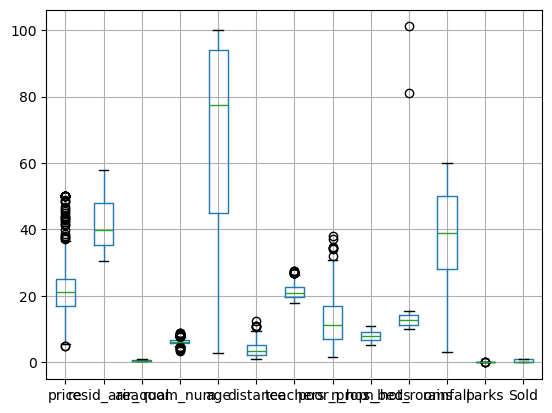

In [39]:
df_houseprice.boxplot()
plt.show()

**Interpretation** 
 - We have outliers in the data, most of the outliers are in age column.

## Data Preprocessing

### a. Data cleaning

In [43]:
# show the first five lines of the data
df_houseprice.head(5)

,price,resid_area,air_qual,room_num,age,distance,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [44]:
# Rename the columns 
# Step1 : Show the column Names 
df_houseprice.columns

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'distance',
       'teachers', 'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms',
       'waterbody', 'rainfall', 'bus_ter', 'parks', 'Sold'],
      dtype='object')

In [45]:
# Step2 : Allocate New column namesto Old column names 
# Make the Dictionary('Old column name': 'New column name')
d1 = {'price':'Price',
      'resid_area' : 'Residential_Area',
      'air_qual': 'Air_Quality',
      'room_num': 'Room_Numbers',
      'age' : 'Age',
      'distance': 'Distance',
      'teachers': 'Teachers', 
      'poor_prop': 'Proportion_Of_Poor_Population', 
      'airport': 'Airport',
      'n_hos_beds': 'Number_Of_Hospital_Beds',
      'n_hot_rooms': 'Number_Of_Hotel_Rooms', 
      'waterbody' : 'Waterbody', 
      'rainfall' : 'Rainfall', 
      'bus_ter': 'Bus_Terminal', 
      'parks': 'Parks',
      'Sold': 'Sold'
     }

In [46]:
df_houseprice = df_houseprice.rename(columns=d1)

In [47]:
# Authenticate the results 
df_houseprice.columns

Index(['Price', 'Residential_Area', 'Air_Quality', 'Room_Numbers', 'Age',
       'Distance', 'Teachers', 'Proportion_Of_Poor_Population', 'Airport',
       'Number_Of_Hospital_Beds', 'Number_Of_Hotel_Rooms', 'Waterbody',
       'Rainfall', 'Bus_Terminal', 'Parks', 'Sold'],
      dtype='object')

### b. Null Value Handling

In [49]:
# Find the Valid null values
df_houseprice.isnull().sum()

Price                              0
Residential_Area                   0
Air_Quality                        0
Room_Numbers                       0
Age                                0
Distance                           0
Teachers                           0
Proportion_Of_Poor_Population      0
Airport                            0
Number_Of_Hospital_Beds            8
Number_Of_Hotel_Rooms              0
Waterbody                        155
Rainfall                           0
Bus_Terminal                       0
Parks                              0
Sold                               0
dtype: int64

In [50]:
# % missing values 
null_percentage =  (df_houseprice.isnull().sum() / len(df_houseprice)) * 100

In [51]:
null_percentage

Price                             0.000000
Residential_Area                  0.000000
Air_Quality                       0.000000
Room_Numbers                      0.000000
Age                               0.000000
Distance                          0.000000
Teachers                          0.000000
Proportion_Of_Poor_Population     0.000000
Airport                           0.000000
Number_Of_Hospital_Beds           1.581028
Number_Of_Hotel_Rooms             0.000000
Waterbody                        30.632411
Rainfall                          0.000000
Bus_Terminal                      0.000000
Parks                             0.000000
Sold                              0.000000
dtype: float64

In [52]:
# Find the nature of the column
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          506 non-null    float64
 1   Residential_Area               506 non-null    float64
 2   Air_Quality                    506 non-null    float64
 3   Room_Numbers                   506 non-null    float64
 4   Age                            506 non-null    float64
 5   Distance                       506 non-null    float64
 6   Teachers                       506 non-null    float64
 7   Proportion_Of_Poor_Population  506 non-null    float64
 8   Airport                        506 non-null    object 
 9   Number_Of_Hospital_Beds        498 non-null    float64
 10  Number_Of_Hotel_Rooms          506 non-null    float64
 11  Waterbody                      351 non-null    object 
 12  Rainfall                       506 non-null    int

In [53]:
# This is a categorical column so we can replace the null with mode. 
df_houseprice.Waterbody.mode()[0]

'River'

In [54]:
# Replace the null in that column 
df_houseprice.Waterbody.fillna(df_houseprice.Waterbody.mode()[0],inplace=True)

C:\Users\Chetan\AppData\Local\Temp\ipykernel_17160\1144373256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_houseprice.Waterbody.fillna(df_houseprice.Waterbody.mode()[0],inplace=True)


In [55]:
null_percentage =  (df_houseprice.isnull().sum() / len(df_houseprice)) * 100
null_percentage

Price                            0.000000
Residential_Area                 0.000000
Air_Quality                      0.000000
Room_Numbers                     0.000000
Age                              0.000000
Distance                         0.000000
Teachers                         0.000000
Proportion_Of_Poor_Population    0.000000
Airport                          0.000000
Number_Of_Hospital_Beds          1.581028
Number_Of_Hotel_Rooms            0.000000
Waterbody                        0.000000
Rainfall                         0.000000
Bus_Terminal                     0.000000
Parks                            0.000000
Sold                             0.000000
dtype: float64

In [56]:
# In Number_Of_Hospital_Beds contain less than 10% missing records so we can drop the null values
df_houseprice.dropna(inplace=True)

In [57]:
null_percentage =  (df_houseprice.isnull().sum() / len(df_houseprice)) * 100
null_percentage

Price                            0.0
Residential_Area                 0.0
Air_Quality                      0.0
Room_Numbers                     0.0
Age                              0.0
Distance                         0.0
Teachers                         0.0
Proportion_Of_Poor_Population    0.0
Airport                          0.0
Number_Of_Hospital_Beds          0.0
Number_Of_Hotel_Rooms            0.0
Waterbody                        0.0
Rainfall                         0.0
Bus_Terminal                     0.0
Parks                            0.0
Sold                             0.0
dtype: float64

## Prepare data for machine learning : 

In [59]:
# We know that the machine learning agorithms are mathematical expressioins so we need to provide the data to the  algorithm and specific format 
# Encoding 

In [60]:
# Divide the data based on their data types 
df_cat = df_houseprice.select_dtypes(include=['object'])
df_cat.columns

Index(['Airport', 'Waterbody', 'Bus_Terminal'], dtype='object')

In [61]:
# use dummy encoding
df_var = pd.get_dummies(data = df_cat, drop_first=True)
df_var = df_var.reset_index()

In [62]:
df_var2 = pd.get_dummies(data = df_cat)

In [63]:
df_var

,index,Airport_YES,Waterbody_Lake and River,Waterbody_River
0,0,True,False,True
1,1,False,False,False
2,2,False,False,True
3,3,True,False,False
4,4,False,False,False
...,...,...,...,...
493,501,False,True,False
494,502,True,True,False
495,503,False,False,True
496,504,True,False,True


In [64]:
df_var2

,Airport_NO,Airport_YES,Waterbody_Lake,Waterbody_Lake and River,Waterbody_River,Bus_Terminal_YES
0,False,True,False,False,True,True
1,True,False,True,False,False,True
2,True,False,False,False,True,True
3,False,True,True,False,False,True
4,True,False,True,False,False,True
...,...,...,...,...,...,...
501,True,False,False,True,False,True
502,False,True,False,True,False,True
503,True,False,False,False,True,True
504,False,True,False,False,True,True


In [65]:
df_num = df_houseprice.select_dtypes(include=[np.number])

df_num.head(5)

,Price,Residential_Area,Air_Quality,Room_Numbers,Age,Distance,Teachers,Proportion_Of_Poor_Population,Number_Of_Hospital_Beds,Number_Of_Hotel_Rooms,Rainfall,Parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,4.98,5.480,11.1920,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,9.14,7.332,12.1728,42,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,4.03,7.394,101.1200,38,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,2.94,9.268,11.2672,45,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,5.33,8.824,11.2896,55,0.039474,0


In [66]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [67]:
scale = ss.fit_transform(df_num)

In [68]:
df_target = df_houseprice['Price']

In [69]:
df_feature = df_houseprice.drop('Price',axis = 1)

In [70]:
scale 

array([[ 0.15479189, -1.28244435, -0.13709359, ..., -1.30206786,
        -0.47313205, -0.91152748],
       [-0.10659165, -0.59005882, -0.73319492, ...,  0.21519397,
        -0.77522463,  1.09705963],
       [ 1.32012686, -0.59005882, -0.73319492, ..., -0.10422957,
        -0.81123666, -0.91152748],
       ...,
       [ 0.14390091,  0.11687263,  0.16527665, ..., -0.66322077,
         0.30293265,  1.09705963],
       [-0.06302773,  0.11687263,  0.16527665, ...,  0.6144734 ,
         0.59750894,  1.09705963],
       [-0.38975716,  0.11687263,  0.16527665, ...,  0.45476163,
         0.56369225,  1.09705963]])

In [71]:
scaledd = pd.DataFrame(scale,columns = df_num.columns)

In [72]:
scaledd = scaledd.reset_index()
scaledd

,index,Price,Residential_Area,Air_Quality,Room_Numbers,Age,Distance,Teachers,Proportion_Of_Poor_Population,Number_Of_Hospital_Beds,Number_Of_Hotel_Rooms,Rainfall,Parks,Sold
0,0,0.154792,-1.282444,-0.137094,0.408975,-0.115644,0.172845,1.462167,-1.066368,-1.640299,-0.352111,-1.302068,-0.473132,-0.911527
1,1,-0.106592,-0.590059,-0.733195,0.189974,0.369741,0.476100,0.304963,-0.484136,-0.384875,-0.166019,0.215194,-0.775225,1.097060
2,2,1.320127,-0.590059,-0.733195,1.276446,-0.260905,0.495053,0.304963,-1.199330,-0.342847,16.710340,-0.104230,-0.811237,-0.911527
3,3,1.178544,-1.301354,-0.828226,1.010516,-0.802977,1.054179,-0.111631,-1.351886,0.927490,-0.337843,0.454762,-0.680402,-0.911527
4,4,1.483492,-1.301354,-0.828226,1.222407,-0.505369,1.030487,-0.111631,-1.017382,0.626514,-0.333593,1.253320,-1.404723,-0.911527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,-0.019464,0.116873,0.165277,0.434572,0.022531,-0.637413,-1.176258,-0.409958,0.981720,-0.164805,-0.982644,0.155116,1.097060
494,494,-0.215501,0.116873,0.165277,-0.238073,0.291796,-0.732180,-1.176258,-0.492534,-0.872945,0.022197,-1.541636,0.522886,1.097060
495,495,0.143901,0.116873,0.165277,0.979230,0.798438,-0.779564,-1.176258,-0.973995,-1.641654,-0.162528,-0.663221,0.302933,1.097060
496,496,-0.063028,0.116873,0.165277,0.720411,0.738208,-0.684797,-1.176258,-0.856429,0.027273,0.403791,0.614473,0.597509,1.097060


In [73]:
# Make a dataframe for independent variables. 
X = pd.concat([scaledd,df_var],axis = 1)

In [74]:
X.drop('Price',axis=1,inplace=True)

In [75]:
# Split the data for training and testing 
import statsmodels 
import statsmodels.api as sm 

X = sm.add_constant(X)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,df_target,random_state=10,test_size=0.2)

In [78]:
X_train.head()

,const,index,Residential_Area,Air_Quality,Room_Numbers,Age,Distance,Teachers,Proportion_Of_Poor_Population,Number_Of_Hospital_Beds,Number_Of_Hotel_Rooms,Rainfall,Parks,Sold,index,Airport_YES,Waterbody_Lake and River,Waterbody_River
231,1.0,231,-0.716608,-0.404907,0.623709,-0.069586,-0.149363,0.490115,-0.636692,1.342350,0.034947,-0.583365,-0.970070,1.097060,234,True,False,True
107,1.0,107,-0.373325,-0.292598,0.265344,1.014558,-0.599506,-1.129970,-0.046063,0.471959,-0.548221,0.694329,-0.400734,-0.911527,108,False,True,False
349,1.0,349,-1.324628,-1.242905,0.626554,-1.146643,3.949313,0.675268,-1.133549,-1.218661,-0.153117,0.055482,-0.660973,-0.911527,353,True,False,False
367,1.0,367,1.014356,0.985996,-0.586484,0.748837,-1.352905,-0.805953,-0.520526,1.965994,-0.122912,1.413032,0.954595,-0.911527,372,True,False,True
302,1.0,302,-1.301354,-0.707277,1.610636,0.121734,-0.319944,0.027234,-0.857829,1.876515,-0.148108,-1.302068,-0.364124,1.097060,306,True,False,True


In [79]:
y_train.head()

234    29.0
108    19.8
353    30.1
372    50.0
306    33.4
Name: Price, dtype: float64

## Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [133]:
predictions = lr_model.predict(X_test)
rmse = root_mean_squared_error(y_test,predictions)
rmse

3.9367730928084153

## Ridge Model 

In [136]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

Ridge()

In [138]:
predictions = ridge_model.predict(X_test)
rmse = root_mean_squared_error(y_test,predictions)
rmse

3.9318354145158163

## Lasso Model

In [141]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

In [143]:
predictions = lasso_model.predict(X_test)
rmse = root_mean_squared_error(y_test,predictions)
rmse

4.549547123782034

## Decision Tree Regressor

In [146]:
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [148]:
predictions = dtree_model.predict(X_test)
rmse = root_mean_squared_error(y_test,predictions)
rmse

3.5768142249773045

## Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=20)
rfr_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

In [153]:
predictions = rfr_model.predict(X_test)
rmse = root_mean_squared_error(y_test,predictions)
rmse

2.5603205365734967

## Gaussian Process Regressor

In [156]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(length_scale=1.0)
gpr_model = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10,random_state=42)
gpr_model.fit(X_train,y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, random_state=42)

In [158]:
predictions = gpr_model.predict(X_test)
rmse = root_mean_squared_error(y_test,predictions)
rmse

3.721910215533065

## Polynomial Regression

In [161]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [165]:
predictions = poly_model.predict(X_test_poly)
rmse = root_mean_squared_error(y_test,predictions)
rmse

5.919095197111963

## Neural Network Regression 

In [171]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train_scale.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(),loss='mean_squared_error')

history = model.fit(X_train_scale,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100


C:\Users\Chetan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 572.3398 - val_loss: 487.9095
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 550.8692 - val_loss: 443.1610
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 498.8974 - val_loss: 394.1941
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 446.2643 - val_loss: 339.9921
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 392.4464 - val_loss: 280.8483
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 303.8556 - val_loss: 219.7255
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 239.5249 - val_loss: 161.1593
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.9029 - val_loss: 112.5977
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.3435 - val_loss: 78.9766
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87.3799 - val_loss: 61.2593
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.3208 - val_loss: 53.8066
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━

In [175]:
predictions = model.predict(X_test_scale)
rmse = root_mean_squared_error(y_test,predictions)
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


3.8167134152486435

## KNN 

In [178]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [180]:
predictions = knn_model.predict(X_test_scale)
rmse = root_mean_squared_error(y_test,predictions)
rmse

C:\Users\Chetan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


10.64187765387293

## Support Vector Machine (SVM) 

In [183]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)

SVR()

In [185]:
predictions = svr_model.predict(X_test_scale)
rmse = root_mean_squared_error(y_test,predictions)
rmse

C:\Users\Chetan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


9.778494607741612